In [1]:
import os
import numpy
import keras
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

2024-09-10 10:58:41.620755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 10:58:41.804819: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 10:58:42.446114: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/masterlx/miniconda3/envs/tf/lib/:/lib:/home/masterlx/miniconda3/envs

In [7]:
import tensorflow as tf

# Check if TensorFlow can access a GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow can access the following GPUs:")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow cannot access any GPUs.")

TensorFlow can access the following GPUs:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-09-10 12:04:08.960542: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 12:04:08.986119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 12:04:08.986150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
os.getcwd()

'/mnt/c/Users/Owner/Documents/Projects/MammothInteractiveLearning/mi_source_003/Source Files'

In [3]:
path_to_train_photos   = '/00 Dataset/Dataset/train/train_photo/'

path_to_train_sketches = '/00 Dataset/Dataset/train/train_sketch/'

path_to_test_photos    = '/00 Dataset/Dataset/test/test_photo/'

path_to_test_sketches  = '/00 Dataset/Dataset/test/test_sketch/'



train_photos   = [os.getcwd()+path_to_train_photos+i for i in os.listdir(os.getcwd()+path_to_train_photos) if 'DS_Store' not in i]

train_sketches = [os.getcwd()+path_to_train_sketches+i for i in os.listdir(os.getcwd()+path_to_train_sketches)]

test_photos    = [os.getcwd()+path_to_test_photos+i for i in os.listdir(os.getcwd()+path_to_test_photos) if 'DS_Store' not in i]

test_sketches  = [os.getcwd()+path_to_test_sketches+i for i in os.listdir(os.getcwd()+path_to_test_sketches)]

photos   = train_photos + test_photos 

sketches = train_sketches + test_sketches

In [4]:
print(len(train_sketches))
# print(sketches[187])
print(len(train_photos))
print(photos[3])

88
88
/mnt/c/Users/Owner/Documents/Projects/MammothInteractiveLearning/mi_source_003/Source Files/00 Dataset/Dataset/train/train_photo/f-008-01.jpg


In [5]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


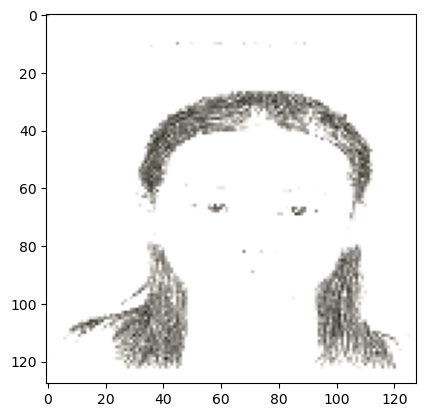

In [6]:
img = load_img(sketches[3], target_size=(128,128,3))
img_array = img_to_array(img)

# Display the image
plt.imshow(img_array/128)


In [12]:
sketches_array = []
photos_array   = []

for i in range(len((photos))):

    sketch_path   = sketches[i]

    loaded_sketch = load_img(sketch_path, target_size=(128, 128, 3))

    loaded_sketch = img_to_array(loaded_sketch)

    sketches_array.append(loaded_sketch)

    photo_path    = photos[i]

    loaded_photo  = load_img(photo_path, target_size=(128, 128, 3))

    loaded_photo  = img_to_array(loaded_photo) 

    photos_array.append(loaded_photo)
  

In [13]:
sketches_array = numpy.array(sketches_array)

photos_array   = numpy.array(photos_array)

sketches_array = sketches_array.astype('float32')

photos_array   = photos_array.astype('float32')

sketches_array = (sketches_array.astype(numpy.float32) - 127.5) / 127.5

photos_array   = (photos_array.astype(numpy.float32) - 127.5) / 127.5

In [27]:
from keras.layers import Input, Conv2D, Activation, Conv2DTranspose, LeakyReLU, Flatten, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

In [18]:
def generator():

    input_layer = Input((128, 128, 3))
    conv1_layer = Conv2D(32, (7,7), strides=(1,1), padding='same')(input_layer)
    conv1_layer = BatchNormalization()(conv1_layer)
    conv1_layer = Activation('relu')(conv1_layer)

    conv2_layer = Conv2D(64, (3,3), strides=(2,2), padding='same')(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation('relu')(conv2_layer)

    conv3_layer = Conv2D(128, (3,3), strides=(2,2), padding='same')(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation('relu')(conv3_layer)

    b1 = Conv2D(128, (3,3), padding='same')(conv3_layer)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block1 = keras.layers.add([b1, b2])

    b1 = Conv2D(128, (3,3), padding='same')(block1)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block2 = keras.layers.add([b1, b2])

    b1 = Conv2D(128, (3,3), padding='same')(block2)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block3 = keras.layers.add([b1, b2])

    b1 = Conv2D(128, (3,3), padding='same')(block3)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block4 = keras.layers.add([b1, b2])

    b1 = Conv2D(128, (3,3), padding='same')(block4)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block5 = keras.layers.add([b1, b2])

    b1 = Conv2D(128, (3,3), padding='same')(block5)
    b1 = BatchNormalization()(b1)
    b1 = Activation('relu')(b1)

    b2 = Conv2D(128, (3,3), padding='same')(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation('relu')(b2)

    block6 = keras.layers.add([b1, b2])

    transpose1 = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same')(block6)
    transpose1 = BatchNormalization()(transpose1)
    transpose1 = Activation('relu')(transpose1)

    transpose2 = Conv2DTranspose(32, (3,3), strides=(2,2), padding='same')(transpose1)
    transpose2 = BatchNormalization()(transpose2)
    transpose2 = Activation('relu')(transpose2)

    conv4_layer = Conv2D(3, (3,3), strides=(1,1), padding='same')(transpose2)
    conv4_layer = BatchNormalization()(conv4_layer)
    conv4_layer = Activation('relu')(conv4_layer)

    return Model(inputs=[input_layer], outputs=[conv4_layer])

In [21]:
generator()

In [22]:
def discriminator():

    input_layer = Input((128, 128, 3))

    conv1_layer = Conv2D(64, (4,4), strides=(2,2))(input_layer)
    conv1_layer = Activation(LeakyReLU(alpha=.2))(conv1_layer)

    conv2_layer = Conv2D(128, (4,4), strides=(2,2))(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation(LeakyReLU(alpha=.2))(conv2_layer)

    conv3_layer = Conv2D(256, (4,4), strides=(2,2))(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation(LeakyReLU(alpha=.2))(conv3_layer)

    conv4_layer = Conv2D(512, (4,4), strides=(2,2))(conv3_layer)
    conv4_layer = BatchNormalization()(conv4_layer)
    conv4_layer = Activation(LeakyReLU(alpha=.2))(conv4_layer)

    output_layer = Flatten()(conv4_layer)

    output_layer = Dense(1, activation='sigmoid')(output_layer)

    return Model(inputs=[input_layer], outputs=[output_layer])

In [23]:
discriminator()

In [24]:
def combined_model(generator, discriminator):

    input_layer = Input((128, 128, 3))

    generator_outputs       = generator(input_layer)

    discriminator.trainable = False

    discriminator_outputs   = discriminator(generator_outputs)

    return Model(inputs=input_layer, 
                outputs=[generator_outputs,
                        discriminator_outputs])

In [25]:
combined_model(generator(), discriminator())

In [36]:
optimizer = keras.optimizers.Adam(learning_rate=0.0002, 
                                  beta_1=0.9,
                                  beta_2=0.999,
                                  epsilon=1e-08,
                                  decay=0.0)

generator_model     = generator()

discriminator_model = discriminator()

model = combined_model(generator_model, discriminator_model)

In [37]:
def mean_squared_error(actual_y, predicted_y):
  
  return 10 * K.mean(K.square(predicted_y - actual_y), axis=-1)

def discriminator_on_generator_loss(actual_y, predicted_y):
  
  return K.mean(K.binary_crossentropy(K.flatten(predicted_y), 
                                      K.ones_like(K.flatten(predicted_y))), 
                axis=-1)
  


def discriminator_loss(actual_y, predicted_y):

  BATCH_SIZE = 30

  return K.mean(K.binary_crossentropy(K.flatten(predicted_y), 
                                      K.concatenate([K.ones_like(K.flatten(predicted_y[:BATCH_SIZE])), 
                                                     K.zeros_like(K.flatten(predicted_y[:BATCH_SIZE]))])), 
                axis=-1)

In [38]:
generator_model.compile(loss=mean_squared_error, optimizer=optimizer)
discriminator_model.compile(loss=discriminator_loss, optimizer=optimizer)

model.compile(loss=[mean_squared_error, 
                    discriminator_on_generator_loss], optimizer=optimizer)

discriminator_model.trainable = True

In [39]:
EPOCHS = 1000

batch_size = 30

for epoch in range(EPOCHS):
  
  generator_model.optimizer.lr.assign(0.0002 * 1 / (1 + 0.001 * epoch))
  discriminator_model.optimizer.lr.assign(0.0002 * 1 / (1 + 0.001 * epoch))

  for batch in range(sketches_array.shape[0] // batch_size):
    
    X = sketches_array[batch * batch_size:(batch+1)*(batch_size)]
    Y = photos_array[batch * batch_size:(batch+1)*(batch_size)]

    fake_photos = generator_model.predict(X, verbose=0)

    discriminator_Y = [1] * batch_size + [0] * batch_size

    discriminator_X = numpy.concatenate((Y, fake_photos), axis=0)

    discriminator_X = discriminator_X * 127.5 + 127.5 #denormalize

    discriminator_Y = numpy.array(discriminator_Y)

    discriminator_model.trainable = True

    for index in range(1):
      discriminator_loss = discriminator_model.train_on_batch(discriminator_X,
                                                              discriminator_Y)
    discriminator_model.trainable = False

    for index in range(1):
      y_label = discriminator_Y[:batch_size]

      generator_loss = model.train_on_batch(X, [Y, y_label])

    discriminator_model.trainable = True

    print(f"Epoch : {epoch}")
    print(f"\tBatch {batch} generator_loss: {generator_loss[0]:f},{generator_loss[1]:f} discriminator_loss: {discriminator_loss:f}")

Epoch : 0
	Batch 0 generator_loss: 13.717797,6.058026 discriminator_loss: 8.083783
Epoch : 0
	Batch 1 generator_loss: 12.642450,5.083964 discriminator_loss: 6.200123
Epoch : 0
	Batch 2 generator_loss: 12.064482,4.515030 discriminator_loss: 7.286781
Epoch : 0
	Batch 3 generator_loss: 11.888632,4.372363 discriminator_loss: 8.374762
Epoch : 0
	Batch 4 generator_loss: 11.170273,3.632968 discriminator_loss: 8.354278
Epoch : 0
	Batch 5 generator_loss: 11.019082,3.458245 discriminator_loss: 7.094403
Epoch : 1
	Batch 0 generator_loss: 10.823228,3.318216 discriminator_loss: 8.369098
Epoch : 1
	Batch 1 generator_loss: 10.309385,2.784435 discriminator_loss: 6.454822
Epoch : 1
	Batch 2 generator_loss: 10.108585,2.566236 discriminator_loss: 7.569549
Epoch : 1
	Batch 3 generator_loss: 10.253956,2.706337 discriminator_loss: 8.703768
Epoch : 1
	Batch 4 generator_loss: 9.980208,2.432804 discriminator_loss: 8.680223
Epoch : 1
	Batch 5 generator_loss: 9.958323,2.387645 discriminator_loss: 7.457115
Epoch 

1/1 [==============================] - 0s 13ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


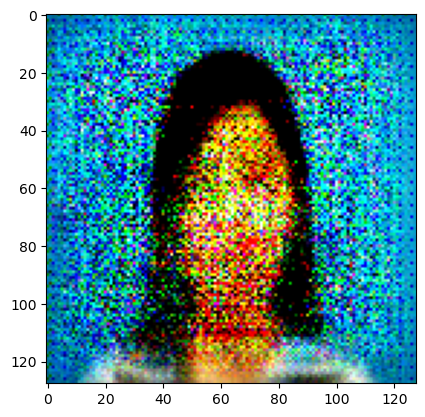

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


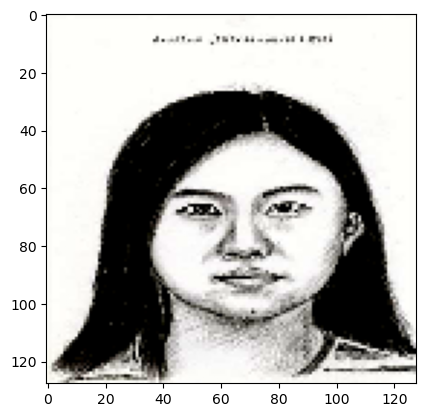

In [40]:
test_path  = os.getcwd()+'/00 Dataset/Dataset/test/test_sketch//f-039-01-sz1.jpg'

test_image = load_img(test_path, target_size=(128, 128, 3))

test_image = img_to_array(test_image)

test_image = (test_image.astype(numpy.float32) - 127.5) / 127.5

zeros_array = numpy.zeros((1, 128, 128, 3))

zeros_array[0] = test_image.astype(numpy.float32)

result_photo = generator_model.predict(zeros_array)


plt.imshow(result_photo[0])
plt.show()
plt.imshow(test_image)
plt.show()